In [10]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")


한글 폰트 설정이 완료되었습니다.


In [2]:
# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
# dataframe 확인해라!
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 5: 재고가 10개 미만으로 남은 상품 중, 최근 30일간 판매량이 가장 많았던 상품 5개를 찾아 긴급 재고 확보 우선순위를 정하세요.
# 비즈니스 목적: 품절로 인한 판매 기회 손실을 최소화하기 위해, 시급하게 재고를 확보해야 할 상품을 결정합니다.

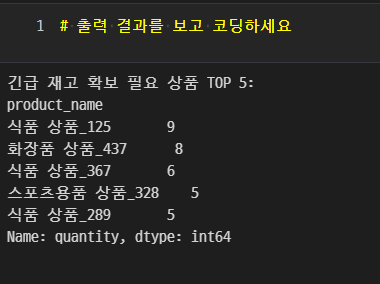  

In [6]:
# 재고가 10개 미만으로 남은 상품 중, 최근 30일간 판매량이 가장 많았던 상품 5개를 찾아 긴급 재고 확보 우선순위를 정하세요.
# 5.1 재고가 10개미만 남은 상품 구하기 
# df.to_csv('../data/df.csv')
# products_df.columns
# products_df[products_df['product_id'] == 'P0263'] 값이 df 와 동일함
df.columns

Index(['order_id', 'customer_id', 'product_id', 'order_date', 'quantity',
       'payment_id', 'payment_method', 'payment_status', 'payment_date',
       'product_name', 'category', 'price', 'stock', 'name', 'gender', 'age',
       'join_date', 'city', 'shipping_id', 'shipping_company',
       'shipping_status', 'shipping_start_date', 'shipping_end_date',
       'total_sales'],
      dtype='object')

In [14]:
pd.Timestamp.now()

Timestamp('2025-10-23 17:29:50.923820')

In [15]:
# 오늘 날짜 기준 최근 30일
start_date = pd.Timestamp.now() - pd.Timedelta(days=30)
# start_date : 검증용 

# 조건 필터링
filtered = df[
    (df['stock'] < 10) & # 재고가 10개 미만
    (df['order_date'] >= start_date) # 최근 30일 이내 판매
]

# 상품별 판매량 집계 Series 만들기 
top_products = (
    filtered.groupby('product_name')['quantity']
    .sum() # 판매량 집계
    .sort_values(ascending=False) # 정렬
    .head()
)

# 결과 Series
print("긴급 재고 확보 필요 상품 TOP 5:")
print(top_products)

긴급 재고 확보 필요 상품 TOP 5:
product_name
식품 상품_125       9
화장품 상품_437      8
식품 상품_367       6
스포츠용품 상품_328    5
식품 상품_289       5
Name: quantity, dtype: int64
